In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import lib_data_load as ld
import lib_data_ref as dr
from datetime import date

import seaborn as sns

dir_data = ".\\data\\data_gouv_fr\\"

# Usagers
dic_usagers = ld.load_usagers(folder_path=dir_data, start_year=2020, end_year=2021)

# Caractéristiques
dic_caract = ld.load_caract(folder_path=dir_data, start_year=2020, end_year=2021)

# Véhicules
dic_vehic = ld.load_vehicules(folder_path=dir_data, start_year=2020, end_year=2021)

# Lieux
dic_lieux = ld.load_lieux(folder_path=dir_data, start_year=2020, end_year=2021)

df_usagers = dic_usagers[2020]
df_caract = dic_caract[2020]
df_vehic = dic_vehic[2020]
df_lieux = dic_lieux[2020]

###  Check for duplicated and remove them

In [2]:
print(df_usagers.duplicated().sum())
print(df_usagers.drop_duplicates(inplace=True))
print(df_usagers.duplicated().sum())

print(df_caract.duplicated().sum())
print(df_caract.drop_duplicates(inplace=True))
print(df_caract.duplicated().sum())

print(df_vehic.duplicated().sum())
print(df_vehic.drop_duplicates(inplace=True))
print(df_vehic.duplicated().sum())

print(df_lieux.duplicated().sum())
print(df_lieux.drop_duplicates(inplace=True))
print(df_lieux.duplicated().sum())

### Merge data into one DataFrame

In [3]:
df_all = df_usagers.merge(on=['Num_Acc'], right=df_caract, how='left')
df_all = df_all.merge(on=['Num_Acc', 'id_vehicule', 'num_veh'], right=df_vehic, how='left')
df_all = df_all.merge(on='Num_Acc', right=df_lieux, how='left')

### Analyse intercorrelations between variables

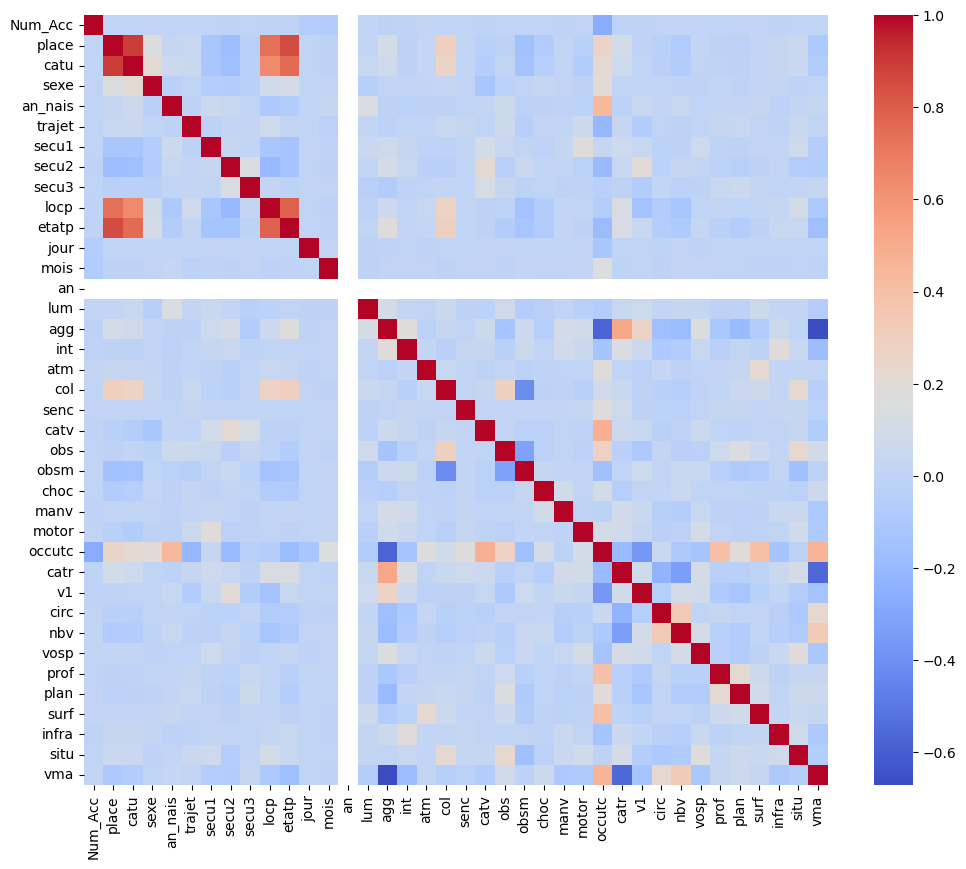

In [6]:
target = df_all['grav']
data = df_all.drop(columns=['grav'], axis=1)

corr = data.corr()

fig = plt.figure(figsize=(12,10))
ax = sns.heatmap(corr, annot=False, cmap='coolwarm');

In [5]:
# print('usagers : ', df_usagers.columns)
# print('caract : ', df_caract.columns)
# print('vehic : ', df_vehic.columns)
# print('lieux : ', df_lieux.columns)
# df_all.info()